In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import os

In [5]:
IMAGE_SIZE = (100,100)
def load_images():
    image = []
    label = []
    image_path = []
    TRAIN_FOLDER_PATH = "C:/Users/pc/Documents/pythonProjects/OPSI2023/images/train" #"D:/Programming/OPSI/images/train"#"C:/Users/pc/Documents/pythonProjects/OPSI/images/train" #ada sebanyak 3421 image
    TEST_FOLDER_PATH = "C:/Users/pc/Documents/pythonProjects/OPSI2023/images/test" #"C:/Users/pc/Documents/pythonProjects/OPSI/images/test" #ada sebanyak 1871 image, total ada 5292 images
    for folder_name in os.listdir(TRAIN_FOLDER_PATH):
        for filename in os.listdir(os.path.join(TRAIN_FOLDER_PATH,folder_name)):
            print(filename)
            subfolder_path = os.path.join(folder_name,filename)
            img = cv2.imread(os.path.join(TRAIN_FOLDER_PATH,subfolder_path))
            img = cv2.resize(img,IMAGE_SIZE)
            image.append(img)
            label.append(folder_name)
            image_path.append(os.path.join(TRAIN_FOLDER_PATH,subfolder_path))

    for folder_name in os.listdir(TEST_FOLDER_PATH):
        for filename in os.listdir(os.path.join(TEST_FOLDER_PATH,folder_name)):
            print(filename)
            subfolder_path = os.path.join(folder_name,filename)
            img = cv2.imread(os.path.join(TEST_FOLDER_PATH,subfolder_path))
            img = cv2.resize(img,IMAGE_SIZE)
            image.append(img)
            label.append(folder_name)
            image_path.append(os.path.join(TEST_FOLDER_PATH,subfolder_path))
    image = np.array(image)
    return image,label, image_path

In [6]:
image,label, image_path = load_images()

adenocarcinoma_left lower lobe T2 N0 M0 Ib (1).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (10).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (100).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (101).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (102).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (103).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (104).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (105).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (106).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (107).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (108) - Copy.png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (108).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (109) - Copy.png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (109).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (11).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (110) - Copy.png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (110).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (111) - Copy.png
adenocarcinoma_left lo

In [7]:
print(len(image)) #banyaknya data gambar untuk train session
print(label)
print(len(label))
image.shape

7871
['Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adeno

(7871, 100, 100, 3)

In [8]:
# i = 5000
# print(label[i])
# cv2.imshow('image',image[i])
# cv2.waitKey(0)

In [9]:
from sklearn.preprocessing import OneHotEncoder
label_encoder = OneHotEncoder()
new_label = np.reshape(label,(-1,1))
new_label = label_encoder.fit_transform(new_label).toarray()

In [10]:
print(new_label)
print(len(new_label [0]))
print(new_label .shape)
# new_label = np.resize(new_label,(5292,10))
print(new_label.shape)
new_label[0]

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]
6
(7871, 6)
(7871, 6)


array([1., 0., 0., 0., 0., 0.])

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(image,new_label,test_size=0.2,random_state=3)

In [12]:
model_lenet5_only = keras.Sequential()
model_lenet5_only.add(keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(100,100, 3)))
model_lenet5_only.add(keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2))
model_lenet5_only.add(keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model_lenet5_only.add(keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2))
model_lenet5_only.add(keras.layers.Flatten())

model_lenet5_only.add(keras.layers.Dense(units=120, activation='relu'))
model_lenet5_only.add(keras.layers.Dense(units=84, activation='relu'))
model_lenet5_only.add(keras.layers.Dense(units=6, activation='softmax'))

In [13]:
model_lenet5_only.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lenet5_only.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 6)         456       
                                                                 
 average_pooling2d (Average  (None, 48, 48, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 22, 22, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 120)               9

In [29]:
history = model_lenet5_only.fit(x_train, y_train, batch_size=32, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
197/197 [==============================] - 15s 75ms/step - loss: 0.0105 - accuracy: 0.9973 - val_loss: 0.0187 - val_accuracy: 0.9949
Epoch 2/10
197/197 [==============================] - 14s 72ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0289 - val_accuracy: 0.9937
Epoch 3/10
197/197 [==============================] - 14s 72ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0137 - val_accuracy: 0.9975
Epoch 4/10
197/197 [==============================] - 14s 71ms/step - loss: 0.0023 - accuracy: 0.9989 - val_loss: 0.0141 - val_accuracy: 0.9962
Epoch 5/10
197/197 [==============================] - 14s 72ms/step - loss: 0.0020 - accuracy: 0.9990 - val_loss: 0.0132 - val_accuracy: 0.9962
Epoch 6/10
197/197 [==============================] - 14s 73ms/step - loss: 0.0020 - accuracy: 0.9986 - val_loss: 0.0132 - val_accuracy: 0.9962
Epoch 7/10
197/197 [==============================] - 14s 71ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0152 - val_accuracy:

Text(0.5, 1.0, 'Akurasi Pada Training Session')

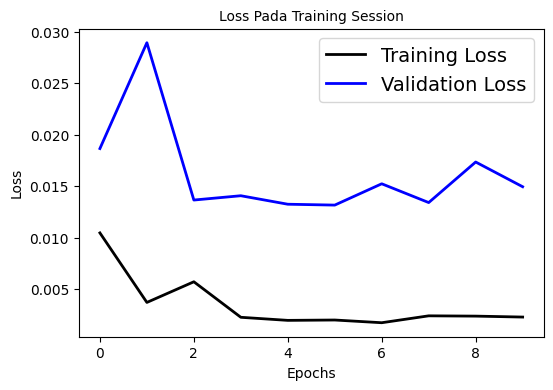

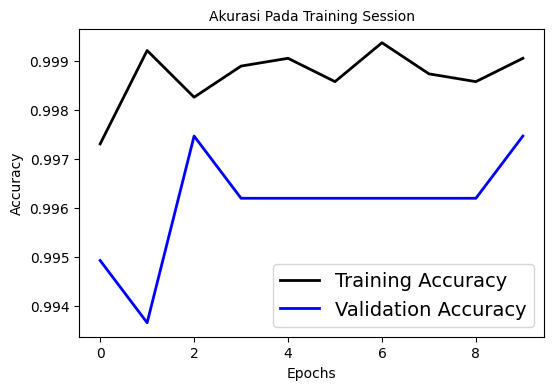

In [33]:
import matplotlib.pyplot as plt

# Plotting the loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Pada Training Session', fontsize=10)

# Plotting the accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Akurasi Pada Training Session',fontsize=10)

In [18]:
model_lenet5_only.evaluate(x_test,y_test)

50/50 [==============================] - 1s 14ms/step - loss: 0.0096 - accuracy: 0.9968


[0.00961213931441307, 0.9968253970146179]

In [16]:
from keras.models import save_model
model_lenet5_only.save('lenet5only.h5')

In [14]:
prediction = model_lenet5_only.predict(x_test)
prediction

50/50 [==============================] - 1s 13ms/step


array([[1.7109471e-07, 3.3154154e-06, 2.4440322e-10, 9.9999654e-01,
        1.4045340e-10, 1.1037095e-08],
       [4.1829913e-05, 6.0232724e-05, 1.6328688e-07, 9.9989688e-01,
        4.7295799e-08, 8.8597005e-07],
       [2.2220932e-13, 1.4410068e-06, 9.9999809e-01, 5.0853026e-07,
        1.4096892e-10, 2.7175178e-09],
       ...,
       [7.1959949e-10, 9.9999988e-01, 2.4353148e-14, 1.4180104e-07,
        1.3720062e-12, 6.8143078e-09],
       [1.9655090e-11, 1.3432741e-06, 9.9999845e-01, 2.4587970e-07,
        7.2091217e-09, 1.5102563e-08],
       [8.8817301e-11, 2.4632389e-09, 4.5370422e-12, 5.0745070e-15,
        4.4406017e-14, 1.0000000e+00]], dtype=float32)

In [17]:
jenis_kanker = ["Adenocarcinoma","Kanker Ganas","Kanker Jinak", "Sehat", "Sel Besar Karsinoma", "Sel Besar Skuamous"]
banyak_kesalahan = 0
for i in range(len(prediction)):
    if jenis_kanker[np.argmax(prediction[i])] != jenis_kanker[np.argmax(y_test[i])]:
        banyak_kesalahan += 1
        print("data ke :",  i+1)
        print("Prediction : " + jenis_kanker[np.argmax(prediction[i])])
        print("Kunci Jawaban: ",jenis_kanker[np.argmax(y_test[i])])
        print()
print(banyak_kesalahan)

data ke : 533
Prediction : Sel Besar Skuamous
Kunci Jawaban:  Adenocarcinoma

data ke : 556
Prediction : Sel Besar Karsinoma
Kunci Jawaban:  Sel Besar Skuamous

data ke : 599
Prediction : Sel Besar Karsinoma
Kunci Jawaban:  Sel Besar Skuamous

data ke : 1212
Prediction : Sel Besar Karsinoma
Kunci Jawaban:  Sel Besar Skuamous

data ke : 1398
Prediction : Sel Besar Skuamous
Kunci Jawaban:  Adenocarcinoma

5


In [15]:
akurasi_training = model_lenet5_only.evaluate(x_train,y_train)[1]
akurasi_testing = model_lenet5_only.evaluate(x_test,y_test)[1]

50/50 [==============================] - 1s 13ms/step - loss: 0.0096 - accuracy: 0.9968


In [ ]:
print("Akurasi training session :",akurasi_training)
print("Akurasi testing session :",akurasi_testing)